In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
#Here is the Python code for constructing a boosted decision tree model with a 4D input and a 1D output (using y1 for the regression task). 
# The data is split into training, validation, and testing sets in a 60%, 20%, and 20% ratio, respectively. 
# The x1 feature and the target variable y1 are transformed using the provided functions.

In [6]:
df = pd.read_csv('dataset.csv')

# Define the transformation functions
def x_scale(x, p=7.5):
    return 1/p * np.log(1 + x * (np.exp(p) - 1))


#def y_scale(y):
 #   return np.log(1 + y) if y >= 0 else -np.log(1 - y)

def y_scale(y):
    return np.where(y >= 0, np.log(1 + y), -np.log(1 - y))



In [7]:
# Apply transformations
df['x1'] = x_scale(df['x1'])
#df['y1'] = df['y1'].apply(y_scale)
df['y1'] = y_scale(df['y1'])

# Splitting the data into input features and target variable
X = df[['x1', 'x2', 'x3', 'x4']]
y = df['y1']  # I am are choosing y1 for the regression task

c:\Users\adity\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
# Splitting the data into training, validation, and testing sets (60%, 20%, 20%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [8]:

model = GradientBoostingRegressor(
    n_estimators=150,  # number of boosting stages to be run
    max_depth= 4,  # maximum depth of each tree
    min_samples_split=2,  # minimum samples required to split an internal node
    min_samples_leaf=1  # minimum samples required to be at a leaf node
)

# Training the modelmodel = GradientBoostingRegressor(
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=150)

In [9]:

print("Test set accuracy: {:.4f}".format(model.score(X_test,y_test)))

Test set accuracy: 0.9851


In [10]:
# Evaluating the model on the validation set
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}")


# Evaluating the model on the test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

Validation MSE: 0.19552328445882264
Test MSE: 0.19631137202295482


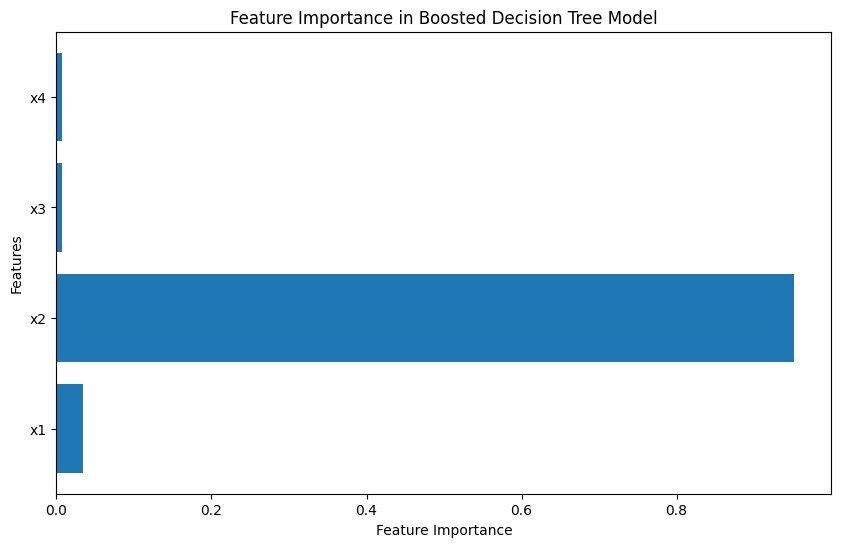

In [11]:
# Plotting the feature importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Boosted Decision Tree Model')
plt.show()

In [2]:
from sklearn.model_selection import KFold
#will use k as 10



In [12]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)


for train_index, test_index in kfold.split(df):
    # Print the indices of the train and test sets
    print('Train indices:', train_index)
    print('Test indices:', test_index)
    
    # Print the actual train and test DataFrames
    print('Train data:\n', df.iloc[train_index])
    print('Test data:\n', df.iloc[test_index])


Train indices: [     1      2      4 ... 999996 999997 999998]
Test indices: [     0      3      8 ... 999980 999988 999999]
Train data:
               x1        x2        x3        x4        y1          y2
1       0.000469  0.495374  0.961166  0.213009  4.270934  -79.824819
2       0.000546  0.045435  0.109773  0.292582  4.332126  -77.123068
4       0.000698  0.606808  0.861252  0.604051 -3.335759   26.709271
5       0.000753  0.623257  0.662706  0.978168 -4.338092   80.145387
6       0.000783  0.333943  0.772378  0.015987  5.057732 -172.882078
...          ...       ...       ...       ...       ...         ...
999994  0.708763  0.648808  0.003329  0.923629 -2.644603    6.653641
999995  0.708798  0.017806  0.594506  0.500338  5.961519  -64.342897
999996  0.708874  0.100856  0.503775  0.872723  4.512761  -27.617936
999997  0.708960  0.154529  0.147156  0.431693  4.060644  -21.132118
999998  0.708984  0.282299  0.888741  0.684521  3.241564   -9.313387

[900000 rows x 6 columns]
Test da

In [17]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import cross_validate

In [15]:
NUM_TRIALS = 30

p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}



# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)


In [18]:
def do_cross_validation(clf, print_model=False):
    cv = cross_validate(clf, X, y, scoring='accuracy', cv=3)
    scores = ' + '.join(f'{s:.2f}' for s in cv["test_score"])
    mean_ = cv["test_score"].mean()
    msg = f'Cross-validated accuracy: ({scores}) / 3 = {mean_:.2f}'
    
    if print_model:
        msg = f'{clf}:\n\t{msg}\n'
    
    print(msg)

In [21]:
clf_grid = GridSearchCV(GradientBoostingRegressor(min_samples_split = 2, min_samples_leaf = 1), param_grid={'n_estimators': [100, 150]})
do_cross_validation(clf_grid, print_model=True)

KeyboardInterrupt: 

In [ ]:
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)

   #Y is continuous
    print("Labels unique values:", np.unique(y))
    print("Labels data type:", y.dtype)

    

    # Non-nested parameter search and scoring
    try:
        clf_non_nested = GradientBoostingRegressor(
            n_estimators=150,  # number of boosting stages to be run
            max_depth= 4,  # maximum depth of each tree
            min_samples_split=2,  # minimum samples required to split an internal node
            min_samples_leaf=1  # minimum samples required to be at a leaf node
        )
        clf_non_nested.fit(X, y)
        non_nested_scores[i] = clf_non_nested.best_score_
    except ValueError as e:
        print(f"Non-nested CV error: {e}")
        non_nested_scores[i] = np.nan  # Set to NaN in case of error
        
    
    #clf_nested = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv, error_score='raise')
    #nested_score = cross_val_score(clf_nested, X=X, y=y, cv=outer_cv)
    #nested_scores[i] = nested_score.mean()

In [ ]:
NUM_TRIALS = 3
for i in range(NUM_TRIALS):
    # Choose cross-validation techniques for the inner and outer loops
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)

    # Y is continuous
    print("Labels unique values:", np.unique(y))
    print("Labels data type:", y.dtype)

    # Non-nested parameter search and scoring
    try:
        clf_non_nested = GradientBoostingRegressor(
            n_estimators=150,  # number of boosting stages to be run
            max_depth=4,  # maximum depth of each tree
            min_samples_split=2,  # minimum samples required to split an internal node
            min_samples_leaf=1  # minimum samples required to be at a leaf node
        )
        clf_non_nested.fit(X, y)

       
        y_pred = clf_non_nested.predict(X)
        non_nested_scores[i] = mean_squared_error(y, y_pred)
    except ValueError as e:
        print(f"Non-nested CV error: {e}")
        non_nested_scores[i] = np.nan

        print('')

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold

# Define the model
model = GradientBoostingRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of boosting stages
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'learning_rate': [0.01, 0.05, 0.1]  # Learning rate shrinks the contribution of each tree
}

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)

KeyboardInterrupt: 

In [22]:
print('done fr now')
print('')

done fr now
